In [81]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import re

In [82]:
def parse_startswith(startswith: str, filename='log_gpu.txt'):
    with open(filename) as f:
        for line in f.readlines():
            if line.startswith(startswith):
                yield line[len(startswith):]

Text(0.5, 1.0, 'Training Loss')

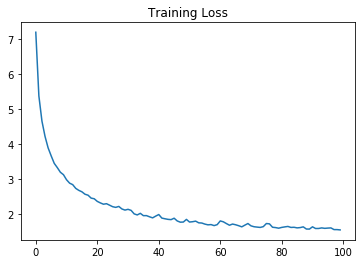

In [83]:
plt.plot(list(map(float, parse_startswith(' Loss = '))))
plt.title('Training Loss')

Text(0.5, 1.0, 'Training Accuracy')

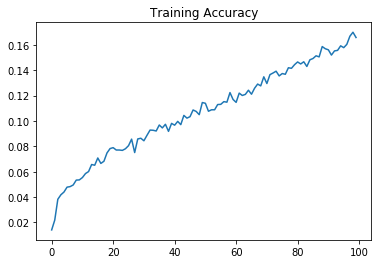

In [84]:
plt.plot(list(map(float, parse_startswith(' Train acc_qm: '))))
plt.title('Training Accuracy')

Text(0.5, 1.0, 'Dev Accuracy')

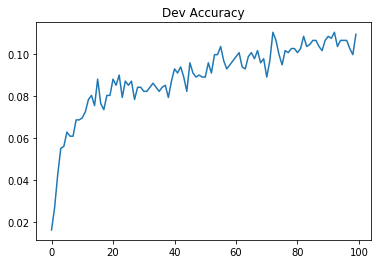

In [85]:
plt.plot(list(map(float, parse_startswith(' Dev acc_qm: '))))
plt.title('Dev Accuracy')

In [109]:
def get_breakdown(filename='log_gpu.txt'):
    train, dev = [], []
    for i, line in enumerate(parse_startswith(' Breakdown results: ', filename)):
        into = train if (i%2 == 0) else dev
        data = [
            re.search("(?<=sel: )(.*?),", line).group(0)[:-1],
            re.search("(?<=cond: )(.*?),", line).group(0)[:-1],
            re.search("(?<=group: )(.*?),", line).group(0)[:-1],
            re.search("(?<=order: ).*$", line).group(0)
        ]
        into.append(list(map(float, data)))
    return ['sel', 'cond', 'group', 'order'], np.array([train, dev])

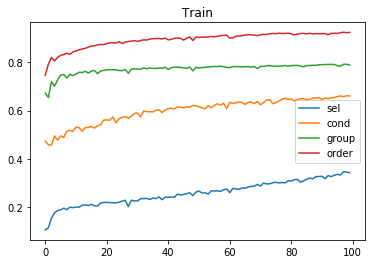

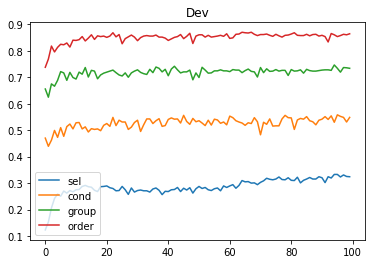

In [129]:
# Train
plt.title('Train')
titles, data = get_breakdown()
for col, l in zip(data[0].T, titles):
    plt.plot(col, label=l)
plt.legend()
plt.show()

# Dev
plt.title('Dev')
titles, data = get_breakdown()
for col, l in zip(data[1].T, titles):
    plt.plot(col, label=l)
plt.legend()

In [95]:
data

array([[['0.10442857142857143', '0.47285714285714286',
         '0.6727142857142857', ''],
        ['0.11357142857142857', '0.45785714285714285',
         '0.6537142857142857', ''],
        ['0.15314285714285714', '0.4562857142857143',
         '0.7198571428571429', ''],
        ['0.17585714285714285', '0.4942857142857143',
         '0.7012857142857143', ''],
        ['0.18485714285714286', '0.4774285714285714',
         '0.7268571428571429', ''],
        ['0.18728571428571428', '0.4948571428571429',
         '0.7474285714285714', ''],
        ['0.19485714285714287', '0.4878571428571429',
         '0.7492857142857143', ''],
        ['0.18842857142857142', '0.5144285714285715',
         '0.7348571428571429', ''],
        ['0.19885714285714284', '0.518', '0.7511428571428571', ''],
        ['0.1967142857142857', '0.5131428571428571',
         '0.7454285714285714', ''],
        ['0.1997142857142857', '0.531', '0.7512857142857143', ''],
        ['0.1987142857142857', '0.5287142857142857',
 